<a href="https://colab.research.google.com/github/VimukthiRandika1997/Computer-Vision/blob/main/Text_Recognition_PaddleOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## --- Helper functions ---
# These allow to show the image in Colab notebook after running detections

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def imshow(path):
  """
  Show the image...
  Args:
    path: path to the file
  """
  image = cv2.imread(path)
  height, width = image.shape[:2] # (height, width, channels)
  resized_image = cv2.resize(image, (3 * width, 3 * height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

def upload():
  """
  Uploading a file...
  """
  from google.colab import files
  uploaded = files.upload()
  
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print('saved file', name)

def download(path):
  """
  Downloading a file...
  """
  from google.colab import files
  files.download(path)

In [2]:
!python -m pip install paddlepaddle -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.7/121.7 MB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.2/383.2 kB 21.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-api-core 2.11.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.0 which is incompatible.
google-cloud-bigquery 3.9.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0

In [3]:
!pip install "paddleocr>=2.0.1" # Recommend to use version 2.0.1+

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 445.9/445.9 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 84.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 85.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 74.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━

In [5]:
!git clone https://github.com/PaddlePaddle/PaddleOCR.git

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 46355, done.
remote: Counting objects: 100% (221/221), done.
remote: Compressing objects: 100% (164/164), done.
remote: Total 46355 (delta 120), reused 111 (delta 56), pack-reused 46134
Receiving objects: 100% (46355/46355), 339.31 MiB | 16.83 MiB/s, done.
Resolving deltas: 100% (32568/32568), done.
Updating files: 100% (1620/1620), done.


In [6]:
from paddleocr import PaddleOCR,draw_ocr
# Paddleocr supports Chinese, English, French, German, Korean and Japanese.
# You can set the parameter `lang` as `ch`, `en`, `fr`, `german`, `korean`, `japan`
# to switch the language model in order.
ocr = PaddleOCR(use_angle_cls=True, lang='en') # need to run only once to download and load model into memory

# from google.colab.patches import cv2_imshow


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:19<00:00, 206kiB/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer/en_PP-OCRv3_rec_infer.tar


100%|██████████| 9.96M/9.96M [00:19<00:00, 506kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:09<00:00, 233kiB/s]

[2023/05/15 12:07:57] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/usr/local

In [12]:
# %cd PaddleOCR
%mkdir images
# %cd images

In [41]:
img_path = './images/label1.png'
result = ocr.ocr(img_path, cls=True)

for idx in range(len(result)):
    res = result[idx]
    for line in res:
        print(line)

[2023/05/15 12:32:50] ppocr DEBUG: dt_boxes num : 34, elapse : 0.8887395858764648
[2023/05/15 12:32:50] ppocr DEBUG: cls num  : 34, elapse : 0.6315596103668213
[2023/05/15 12:32:59] ppocr DEBUG: rec_res num  : 34, elapse : 8.398941993713379
[[[253.0, 208.0], [964.0, 208.0], [964.0, 272.0], [253.0, 272.0]], ('DOMESTIC EXPRESS', 0.9976527690887451)]
[[[980.0, 208.0], [1661.0, 208.0], [1661.0, 295.0], [980.0, 295.0]], ('DOMEHZ', 0.7428919672966003)]
[[[372.0, 292.0], [836.0, 292.0], [836.0, 324.0], [372.0, 324.0]], ('2018-01-05 XMLPI6.1/90-1604', 0.9558284282684326)]
[[[258.0, 334.0], [708.0, 348.0], [706.0, 400.0], [256.0, 385.0]], ('From : YourCompany', 0.980484127998352)]
[[[1566.0, 337.0], [1711.0, 337.0], [1711.0, 386.0], [1566.0, 386.0]], ('Origin:', 0.9999518990516663)]
[[[395.0, 392.0], [708.0, 399.0], [707.0, 445.0], [394.0, 438.0]], ('YourCompany', 0.9995966553688049)]
[[[1566.0, 392.0], [1747.0, 392.0], [1747.0, 461.0], [1566.0, 461.0]], ('MDT', 0.9943631291389465)]
[[[395.0, 4

In [42]:
# Visualize the results
from PIL import Image
data = result[0]
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in data]
txts = [line[1][0] for line in data]
scores = [line[1][1] for line in data]
im_show = draw_ocr(image, boxes, txts, scores, font_path='/content/PaddleOCR/StyleText/fonts/en_standard.ttf')
im_show = Image.fromarray(im_show)
im_show.save('result1.jpg')

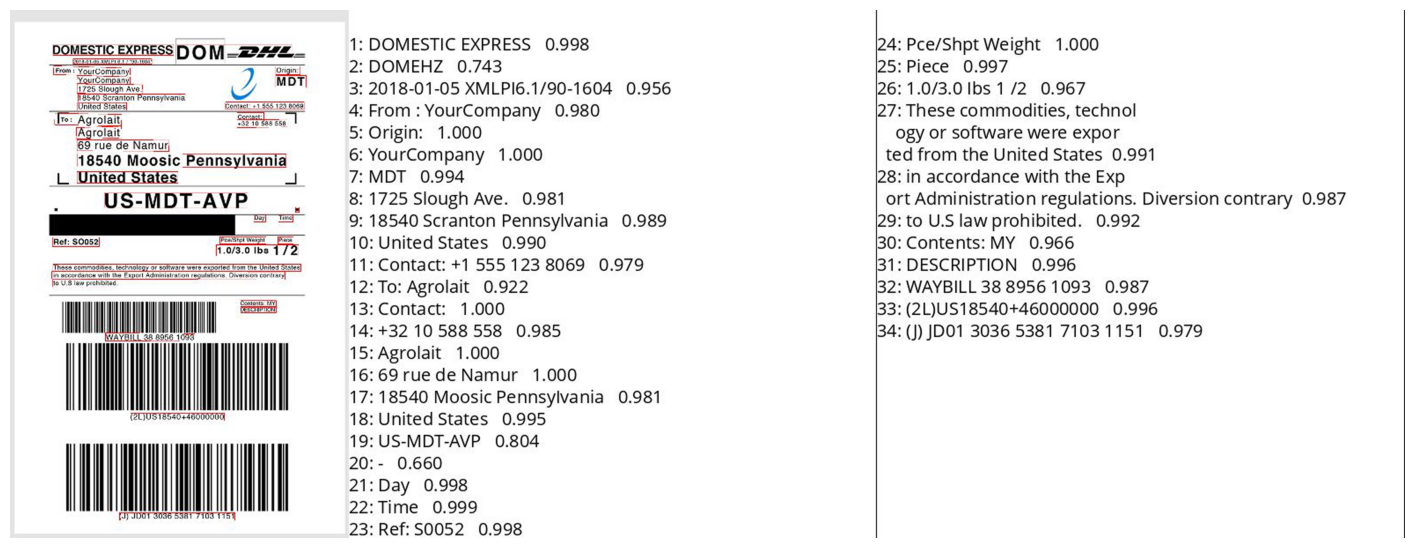

In [43]:
img_path = '/content/PaddleOCR/result1.jpg'
imshow(img_path)

In [44]:
img_path = './images/label2.jpg'
result = ocr.ocr(img_path, cls=True)

for idx in range(len(result)):
    res = result[idx]
    for line in res:
        print(line)

[2023/05/15 12:36:53] ppocr DEBUG: dt_boxes num : 26, elapse : 0.6954658031463623
[2023/05/15 12:36:53] ppocr DEBUG: cls num  : 26, elapse : 0.28649449348449707
[2023/05/15 12:37:01] ppocr DEBUG: rec_res num  : 26, elapse : 7.8280556201934814
[[[293.0, 81.0], [686.0, 81.0], [686.0, 128.0], [293.0, 128.0]], ('UNITED STATES', 0.9650961756706238)]
[[[806.0, 81.0], [1566.0, 75.0], [1567.0, 178.0], [807.0, 184.0]], ('Click-N-Shipe', 0.9436483979225159)]
[[[279.0, 137.0], [730.0, 140.0], [730.0, 187.0], [279.0, 184.0]], ('POSTAL SERVICE :', 0.9277055263519287)]
[[[126.0, 231.0], [405.0, 243.0], [391.0, 588.0], [112.0, 577.0]], ('P', 0.9959313273429871)]
[[[492.0, 254.0], [727.0, 254.0], [727.0, 290.0], [492.0, 290.0]], ('www.usps.com', 0.8932734131813049)]
[[[774.0, 254.0], [1649.0, 254.0], [1649.0, 293.0], [774.0, 293.0]], ('0703 8555 7490 9437 1841 0051 5001 0012 0260', 0.9487731456756592)]
[[[492.0, 293.0], [599.0, 293.0], [599.0, 332.0], [492.0, 332.0]], ('$5.15', 0.9940482974052429)]
[[

In [45]:
# Visualize the results
from PIL import Image
data = result[0]
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in data]
txts = [line[1][0] for line in data]
scores = [line[1][1] for line in data]
im_show = draw_ocr(image, boxes, txts, scores, font_path='/content/PaddleOCR/StyleText/fonts/en_standard.ttf')
im_show = Image.fromarray(im_show)
im_show.save('result2.jpg')

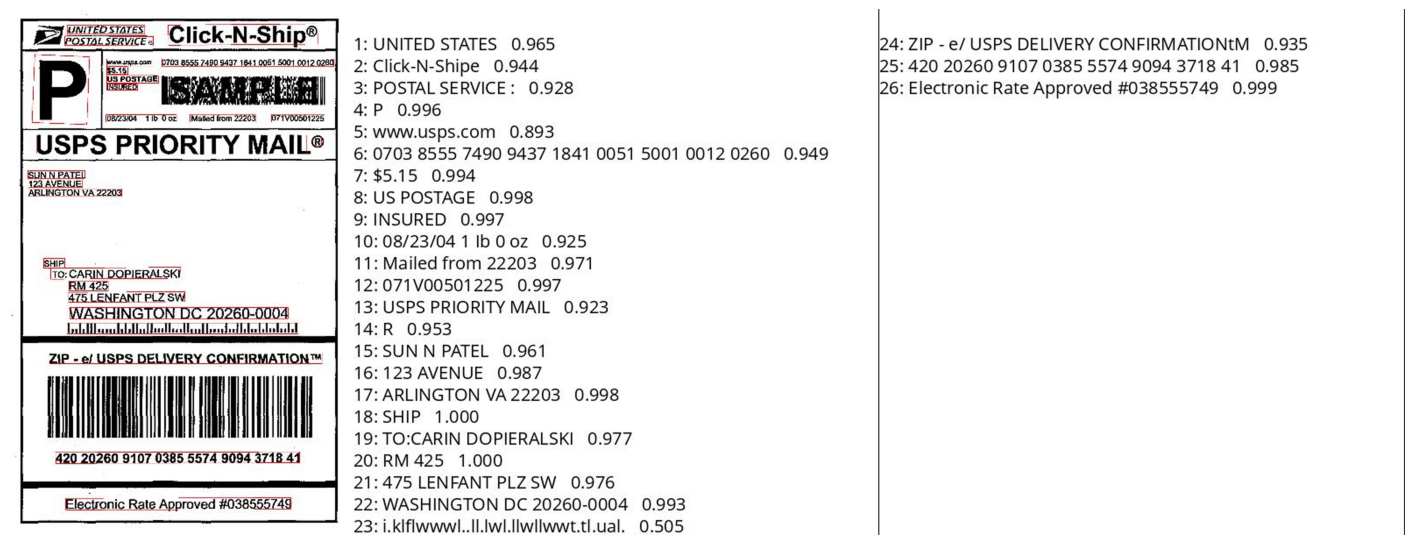

In [46]:
img_path = '/content/PaddleOCR/result2.jpg'
imshow(img_path)